In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
import sklearn
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/covid19-global-forecasting-week-3/submission.csv
/kaggle/input/covid19-global-forecasting-week-3/test.csv
/kaggle/input/covid19-global-forecasting-week-3/train.csv


In [3]:
df = pd.DataFrame(pd.read_csv("/kaggle/input/covid19-global-forecasting-week-3/train.csv"))
print(" The size of the data frame is = {}".format(df.size))

 The size of the data frame is = 141372


In [4]:
df = df.set_index("Id")
df

,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
Id,,,,,
1,NaN,Afghanistan,2020-01-22,0.0,0.0
2,NaN,Afghanistan,2020-01-23,0.0,0.0
3,NaN,Afghanistan,2020-01-24,0.0,0.0
4,NaN,Afghanistan,2020-01-25,0.0,0.0
5,NaN,Afghanistan,2020-01-26,0.0,0.0
...,...,...,...,...,...
32708,NaN,Zimbabwe,2020-04-03,9.0,1.0
32709,NaN,Zimbabwe,2020-04-04,9.0,1.0
32710,NaN,Zimbabwe,2020-04-05,9.0,1.0


In [5]:
df.describe()

,ConfirmedCases,Fatalities
count,23562.000000,23562.000000
mean,801.323275,37.467617
std,6312.495888,468.699337
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,74.000000,0.000000
max,141942.000000,17127.000000


In [6]:
df['Country_Region'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guinea', 'Guine

A date in Python is not a data type of its own, but we can import a module named datetime to work with dates as date objects. 

In [7]:
df['Date'] = pd.to_datetime(df['Date'], format = "%Y-%m-%d") # Timestamp type

In [8]:
confirmed_cases_by_date = df.groupby(['Date']).agg({'ConfirmedCases' : ['sum']})
fatalities_by_date = df.groupby(['Date']).agg({'Fatalities':['sum']})
total_by_date = confirmed_cases_by_date.join(fatalities_by_date)

In [9]:
print(confirmed_cases_by_date.shape)
print(fatalities_by_date.shape)
print(total_by_date.shape)

(77, 1)
(77, 1)
(77, 2)


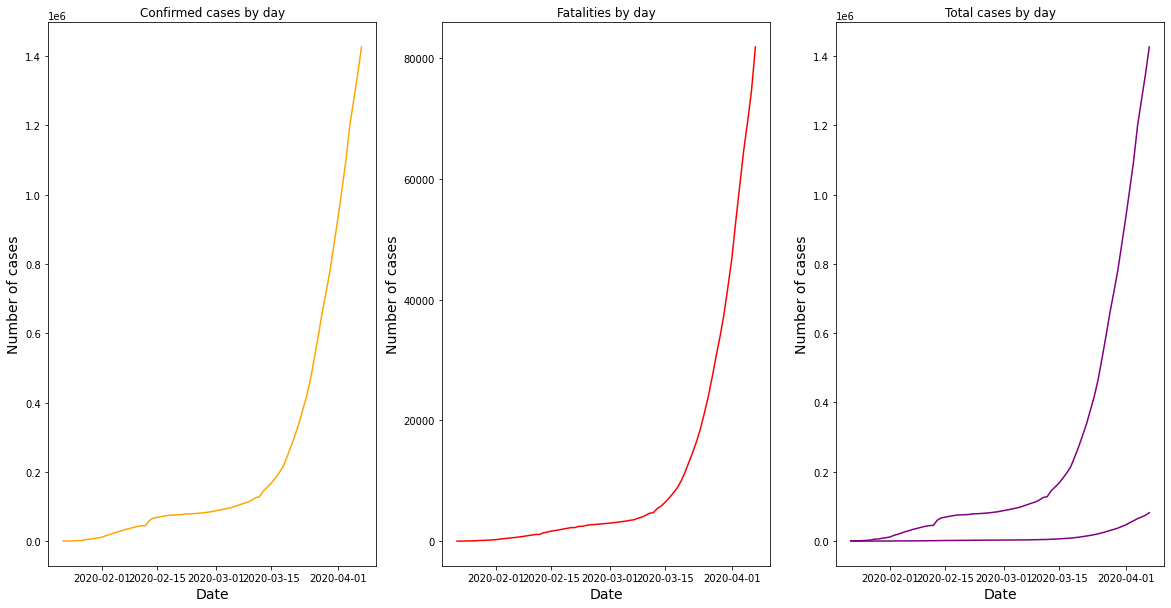

In [10]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (20,10))
ax1.plot(confirmed_cases_by_date, color = 'orange')
ax1.set_title("Confirmed cases by day")
ax1.set_ylabel("Number of cases", size = 14)
ax1.set_xlabel("Date", size = 14)

ax2.plot(fatalities_by_date, color = 'red')
ax2.set_title("Fatalities by day")
ax2.set_ylabel("Number of cases", size = 14)
ax2.set_xlabel("Date", size = 14)

ax3.plot(total_by_date, color = 'purple')
ax3.set_title("Total cases by day")
ax3.set_ylabel("Number of cases", size = 14)
ax3.set_xlabel("Date", size = 14)

plt.show()


Considering COVID-19 started out in China, we shall examine it separately. Moreover, let's analyze the scenario separately in :
1. China
2. India
3. Italy
4. UK
5. USA
6. Taiwan

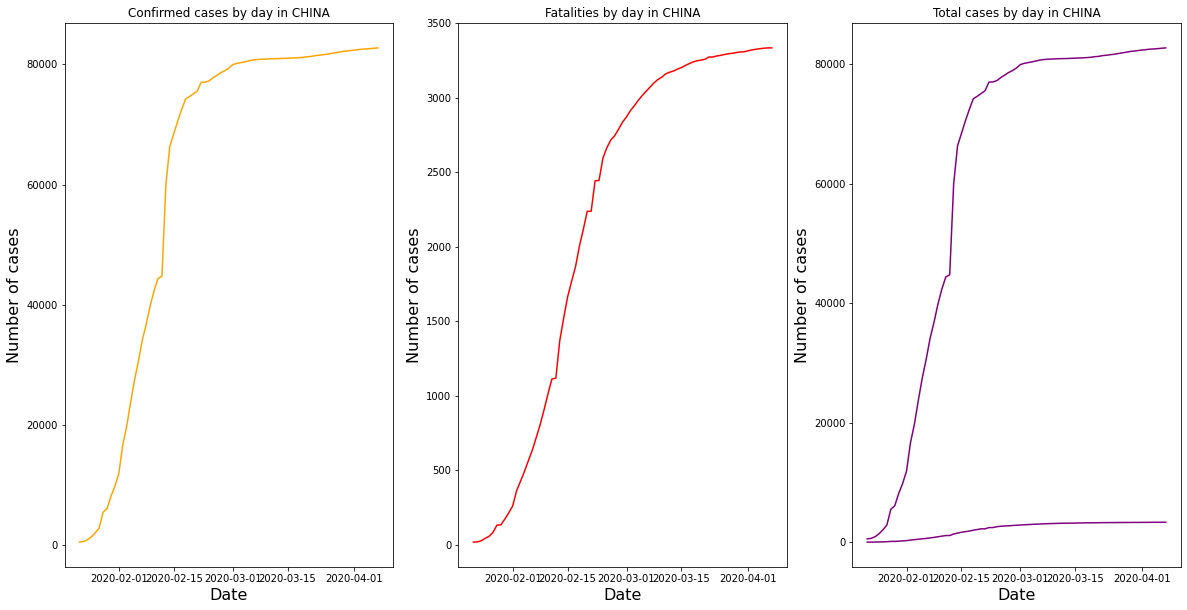

In [11]:
# CHINA
confirmed_cases_by_date_china = df[df['Country_Region'] == 'China'].groupby(['Date']).agg({'ConfirmedCases' : ['sum']})
fatalities_by_date_china = df[df['Country_Region'] == 'China'].groupby(['Date']).agg({'Fatalities' : ['sum']})
total_by_date_china = confirmed_cases_by_date_china.join(fatalities_by_date_china)

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (20,10))
ax1.plot(confirmed_cases_by_date_china, color = 'orange')
ax1.set_title("Confirmed cases by day in CHINA")
ax1.set_ylabel("Number of cases", size = 16)
ax1.set_xlabel("Date", size = 16)

ax2.plot(fatalities_by_date_china, color = 'red')
ax2.set_title("Fatalities by day in CHINA")
ax2.set_ylabel("Number of cases", size = 16)
ax2.set_xlabel("Date", size = 16)

ax3.plot(total_by_date_china, color = 'purple')
ax3.set_title("Total cases by day in CHINA")
ax3.set_ylabel("Number of cases", size = 16)
ax3.set_xlabel("Date", size = 16)

plt.show()

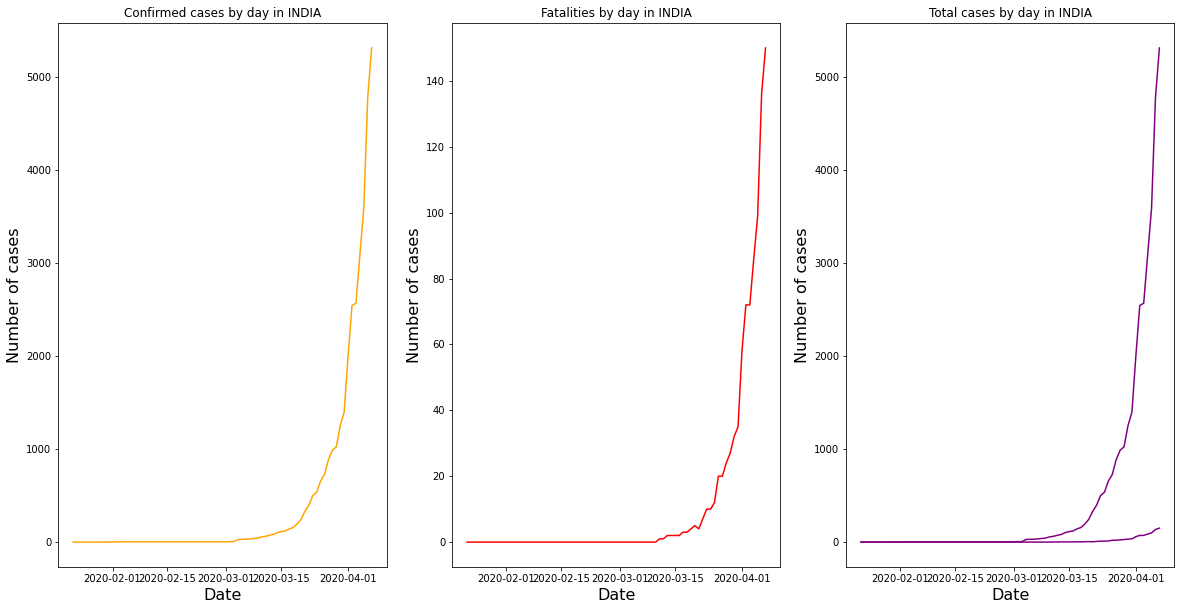

In [12]:
# INDIA
confirmed_cases_by_date_india = df[df['Country_Region'] == 'India'].groupby(['Date']).agg({'ConfirmedCases' : ['sum']})
fatalities_by_date_india = df[df['Country_Region'] == 'India'].groupby(['Date']).agg({'Fatalities' : ['sum']})
total_by_date_india = confirmed_cases_by_date_india.join(fatalities_by_date_india)

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (20,10))
ax1.plot(confirmed_cases_by_date_india, color = 'orange')
ax1.set_title("Confirmed cases by day in INDIA")
ax1.set_ylabel("Number of cases", size = 16)
ax1.set_xlabel("Date", size = 16)

ax2.plot(fatalities_by_date_india, color = 'red')
ax2.set_title("Fatalities by day in INDIA")
ax2.set_ylabel("Number of cases", size = 16)
ax2.set_xlabel("Date", size = 16)

ax3.plot(total_by_date_india, color = 'purple')
ax3.set_title("Total cases by day in INDIA")
ax3.set_ylabel("Number of cases", size = 16)
ax3.set_xlabel("Date", size = 16)

plt.show()

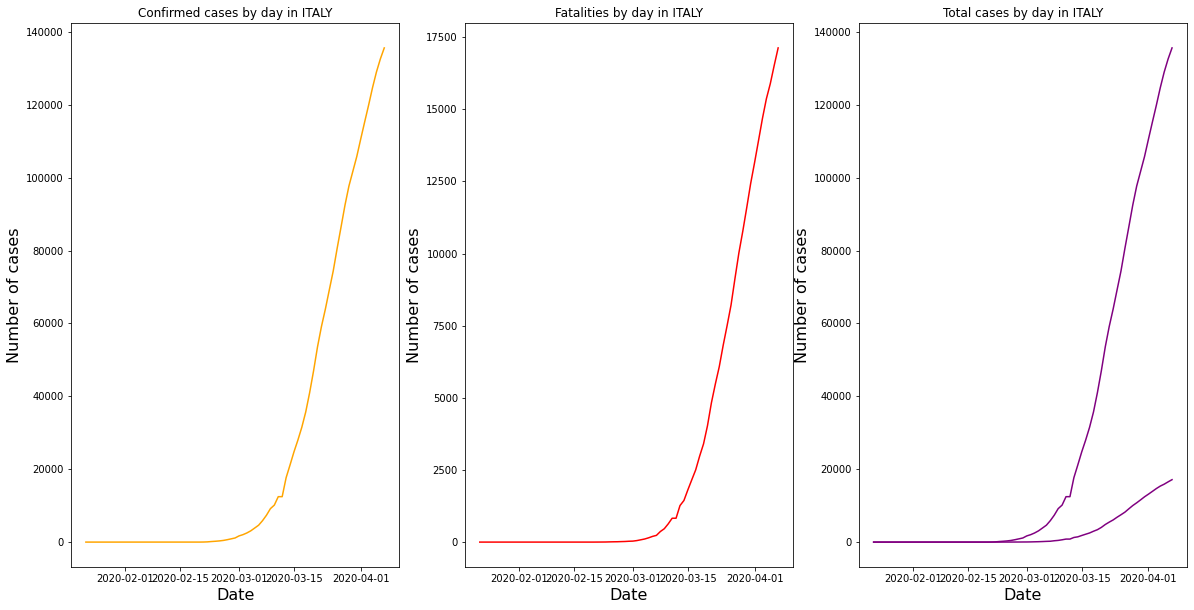

In [13]:
# ITALY
confirmed_cases_by_date_italy = df[df['Country_Region'] == 'Italy'].groupby(['Date']).agg({'ConfirmedCases' : ['sum']})
fatalities_by_date_italy = df[df['Country_Region'] == 'Italy'].groupby(['Date']).agg({'Fatalities' : ['sum']})
total_by_date_italy = confirmed_cases_by_date_italy.join(fatalities_by_date_italy)

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (20,10))
ax1.plot(confirmed_cases_by_date_italy, color = 'orange')
ax1.set_title("Confirmed cases by day in ITALY")
ax1.set_ylabel("Number of cases", size = 16)
ax1.set_xlabel("Date", size = 16)

ax2.plot(fatalities_by_date_italy, color = 'red')
ax2.set_title("Fatalities by day in ITALY")
ax2.set_ylabel("Number of cases", size = 16)
ax2.set_xlabel("Date", size = 16)

ax3.plot(total_by_date_italy, color = 'purple')
ax3.set_title("Total cases by day in ITALY")
ax3.set_ylabel("Number of cases", size = 16)
ax3.set_xlabel("Date", size = 16)

plt.show()

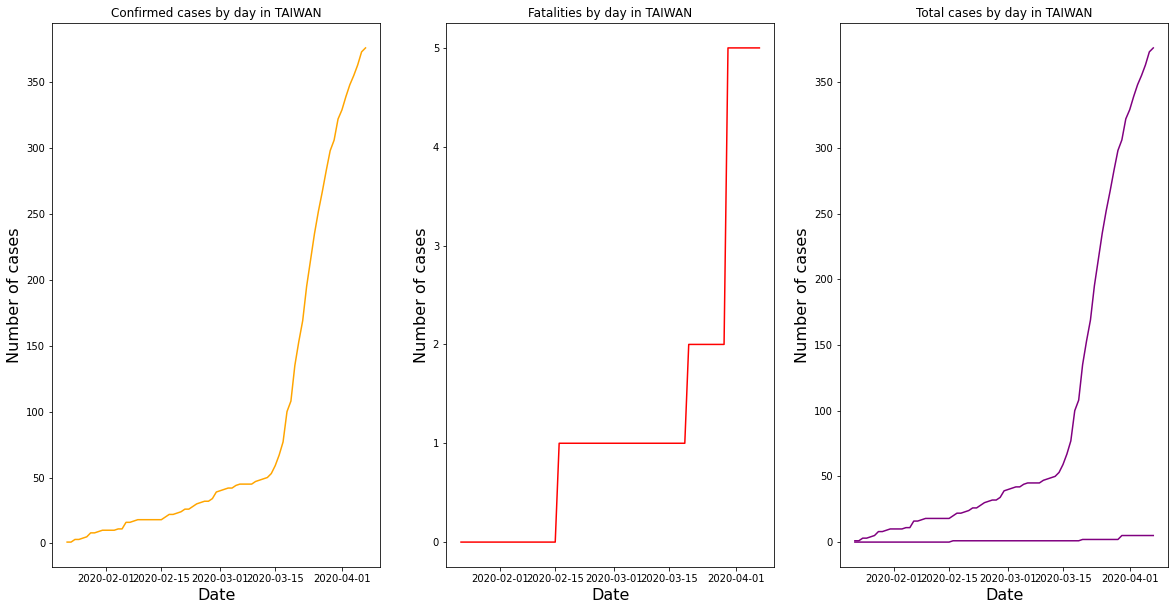

In [14]:
# Taiwan
confirmed_cases_by_date_taiwan = df[df['Country_Region'] == 'Taiwan*'].groupby(['Date']).agg({'ConfirmedCases' : ['sum']})
fatalities_by_date_taiwan = df[df['Country_Region'] == 'Taiwan*'].groupby(['Date']).agg({'Fatalities' : ['sum']})
total_by_date_taiwan = confirmed_cases_by_date_taiwan.join(fatalities_by_date_taiwan)

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (20,10))
ax1.plot(confirmed_cases_by_date_taiwan, color = 'orange')
ax1.set_title("Confirmed cases by day in TAIWAN")
ax1.set_ylabel("Number of cases", size = 16)
ax1.set_xlabel("Date", size = 16)

ax2.plot(fatalities_by_date_taiwan, color = 'red')
ax2.set_title("Fatalities by day in TAIWAN")
ax2.set_ylabel("Number of cases", size = 16)
ax2.set_xlabel("Date", size = 16)

ax3.plot(total_by_date_taiwan, color = 'purple')
ax3.set_title("Total cases by day in TAIWAN")
ax3.set_ylabel("Number of cases", size = 16)
ax3.set_xlabel("Date", size = 16)

plt.show()

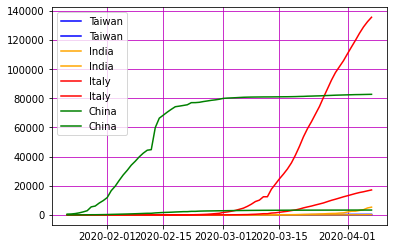

In [15]:
plt.plot(total_by_date_taiwan, color = 'blue', label = 'Taiwan')
plt.plot(total_by_date_india, color = 'orange', label = 'India')
plt.plot(total_by_date_italy, color = 'red', label = 'Italy')
plt.plot(total_by_date_china, color = 'green', label = 'China')
plt.grid("on", which = "major", color = 'm')
plt.legend()
plt.rcParams["figure.figsize"] = (20,15)

In [16]:
df.head()

,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
Id,,,,,
1,NaN,Afghanistan,2020-01-22,0.0,0.0
2,NaN,Afghanistan,2020-01-23,0.0,0.0
3,NaN,Afghanistan,2020-01-24,0.0,0.0
4,NaN,Afghanistan,2020-01-25,0.0,0.0
5,NaN,Afghanistan,2020-01-26,0.0,0.0


In [17]:
df.Province_State.fillna('NaN', inplace = True)

In [18]:
df.head()

,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
Id,,,,,
1,NaN,Afghanistan,2020-01-22,0.0,0.0
2,NaN,Afghanistan,2020-01-23,0.0,0.0
3,NaN,Afghanistan,2020-01-24,0.0,0.0
4,NaN,Afghanistan,2020-01-25,0.0,0.0
5,NaN,Afghanistan,2020-01-26,0.0,0.0


In [19]:
day = []
month = []
for tstamp in df['Date']:
    t = tstamp.to_pydatetime()
    day.append(t.day)
    month.append(t.month)

In [20]:
df['Day'] = day
df['Month'] = month

In [21]:
df = df.drop(['Date'], axis = 1)
df

,Province_State,Country_Region,ConfirmedCases,Fatalities,Day,Month
Id,,,,,,
1,NaN,Afghanistan,0.0,0.0,22,1
2,NaN,Afghanistan,0.0,0.0,23,1
3,NaN,Afghanistan,0.0,0.0,24,1
4,NaN,Afghanistan,0.0,0.0,25,1
5,NaN,Afghanistan,0.0,0.0,26,1
...,...,...,...,...,...,...
32708,NaN,Zimbabwe,9.0,1.0,3,4
32709,NaN,Zimbabwe,9.0,1.0,4,4
32710,NaN,Zimbabwe,9.0,1.0,5,4


In [22]:
oe = OrdinalEncoder()
df[['Province_State','Country_Region']] = oe.fit_transform(df.loc[:,['Province_State','Country_Region']])

In [23]:
df.shape

(23562, 6)

In [24]:
df.head()

,Province_State,Country_Region,ConfirmedCases,Fatalities,Day,Month
Id,,,,,,
1,70.0,0.0,0.0,0.0,22,1
2,70.0,0.0,0.0,0.0,23,1
3,70.0,0.0,0.0,0.0,24,1
4,70.0,0.0,0.0,0.0,25,1
5,70.0,0.0,0.0,0.0,26,1


In [25]:
df_train, df_val = train_test_split(df, test_size = 0.20)

In [26]:
print(df_train.shape)
print(df_val.shape)

(18849, 6)
(4713, 6)


In [27]:
df_train_x = df_train.loc[:, ["Province_State", "Country_Region", "Day", "Month"]]
df_train_y = df_train.loc[:, ["ConfirmedCases", "Fatalities"]]

df_val_x = df_val.loc[:, ["Province_State", "Country_Region", "Day", "Month"]]
df_val_y = df_val.loc[:, ["ConfirmedCases", "Fatalities"]] 

print(df_train_x.shape)
print(df_train_y.shape)
print(df_val_x.shape)
print(df_val_y.shape)

(18849, 4)
(18849, 2)
(4713, 4)
(4713, 2)


In [28]:
import torch
import torch.nn.functional as F

In [29]:
torch.set_default_tensor_type("torch.cuda.DoubleTensor")
dtype = torch.cuda.DoubleTensor

In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
df_train_x_scaled = scaler.fit_transform(df_train_x[["Province_State", "Country_Region", "Day", "Month"]])
df_val_x_scaled = scaler.fit_transform(df_val_x[["Province_State", "Country_Region", "Day", "Month"]])

In [31]:
df_train_y

,ConfirmedCases,Fatalities
Id,,
24441,1.0,0.0
16226,9661.0,158.0
32224,0.0,0.0
17132,0.0,0.0
15944,0.0,0.0
...,...,...
12010,1.0,0.0
7340,1018.0,4.0
18262,169.0,7.0


In [32]:
df_train_x_scaled_tensor = torch.tensor(df_train_x_scaled).cuda()
df_train_y_tensor = torch.tensor(df_train_y.values).cuda()
df_val_x_scaled_tensor = torch.tensor(df_val_x_scaled).cuda()
df_val_y_tensor = torch.tensor(df_val_y.values).cuda()  

print(df_train_x_scaled_tensor.shape, df_val_x_scaled_tensor.shape)
print(df_train_y_tensor.shape, df_val_y_tensor.shape)

torch.Size([18849, 4]) torch.Size([4713, 4])
torch.Size([18849, 2]) torch.Size([4713, 2])
